# SolidMotor Class Usage

Here we explore different features of the SolidMotor class.

Let's start by importing the rocketpy module.

In [1]:
from rocketpy import *


If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.

In [2]:
%matplotlib widget

## Thrust Source

The thrust source is of most importance when analysing parameters such as out of rail velocity, thrust to weight ratio, apogee and many others. Let's create a new motor called MOTOR and take a closer look at this funcionality.

### Constant Thrust

When passing an int or float the thrust will be considered constant in time. 

In [3]:
MOTOR = SolidMotor(
    thrustSource=1500,
    burn_time=(1,5.3),
    reshapeThrustCurve=False,
    grainsCenterOfMassPosition=-0.571,
    grainNumber=6,
    grainSeparation=6 / 1000,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    grainDensity=1707,
    nozzleRadius=21.642 / 1000,
    throatRadius=8 / 1000,
    interpolationMethod="linear",
    nozzlePosition=-1.024,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)


Let's call the info method to see what kind of information we get.


Motor Details
Total Burning Time: 4.3 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 4578.723 m/s
Average Thrust: 1500.000 N
Maximum Thrust: 1500.0 N at 1.0 s after ignition.
Total Impulse: 6450.000 Ns

Plots


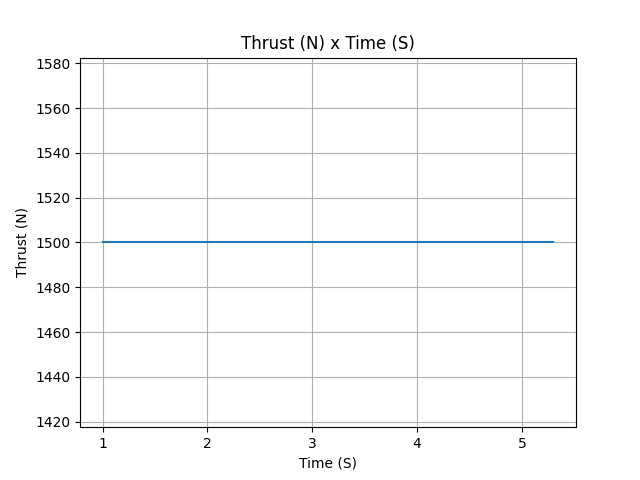

In [4]:
MOTOR.info()


There is valuable information such as Propellant exhaust velocity and Total Impulse being also being displayed. In fact, there is another method called allInfo which outputs even more relevant physical quantities such as grain configuration. Let's try that method also.

Nozzle Details
Nozzle Radius: 0.021641999999999998 m
Nozzle Throat Radius: 0.008 m

Grain Details
Number of Grains: 6
Grain Spacing: 0.006 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Motor Details
Total Burning Time: 4.3 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 4578.723 m/s
Average Thrust: 1500.000 N
Maximum Thrust: 1500.0 N at 1.0 s after ignition.
Total Impulse: 6450.000 Ns

Plots


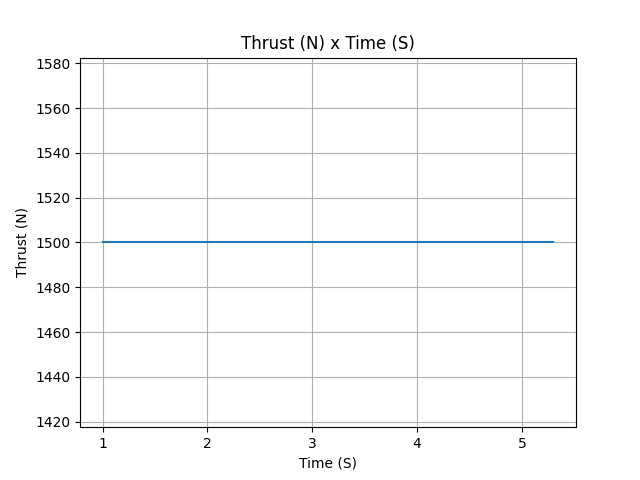

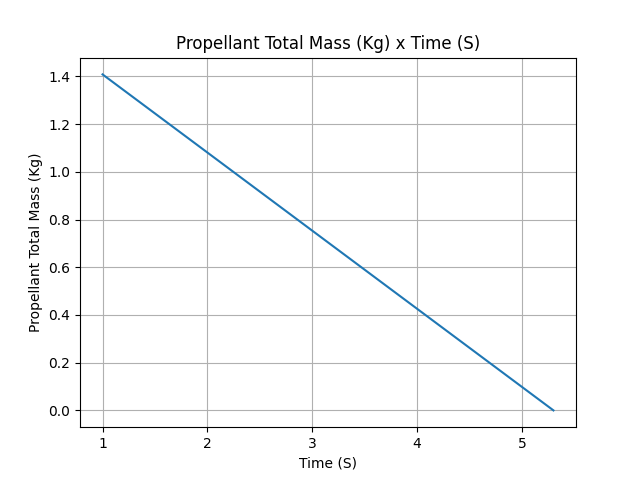

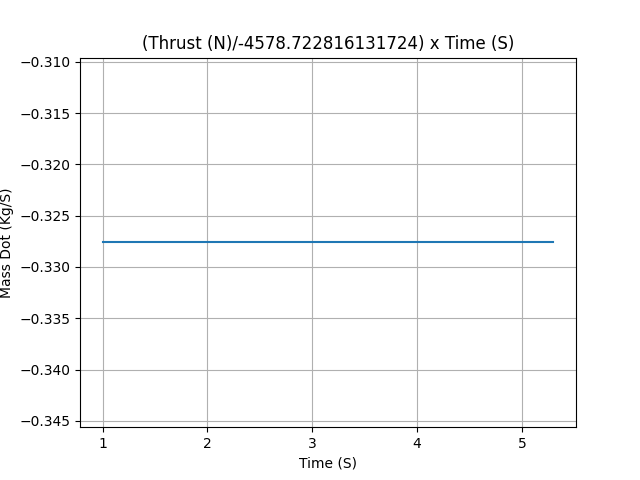

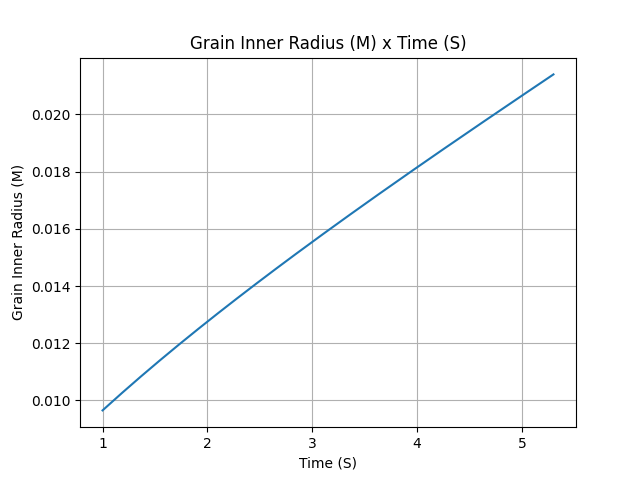

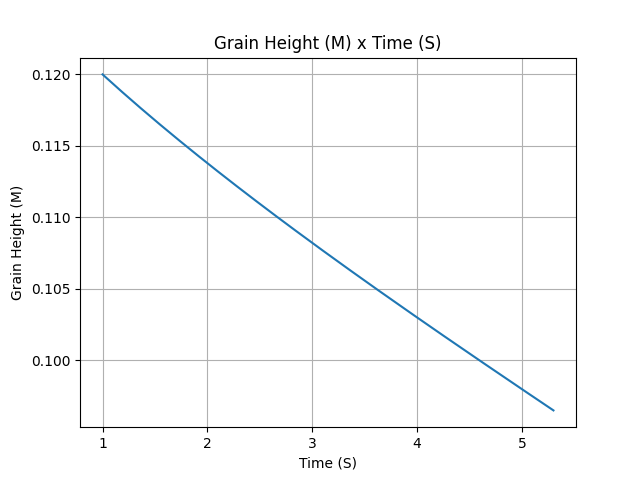

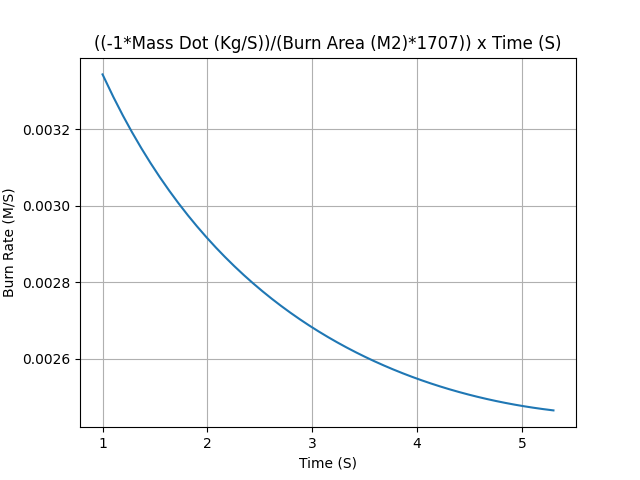

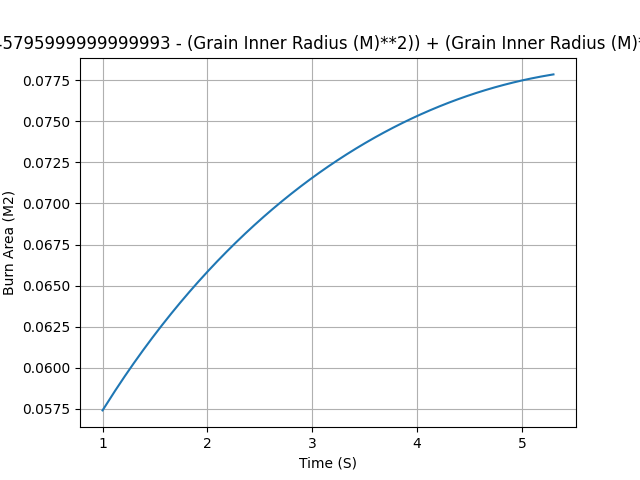

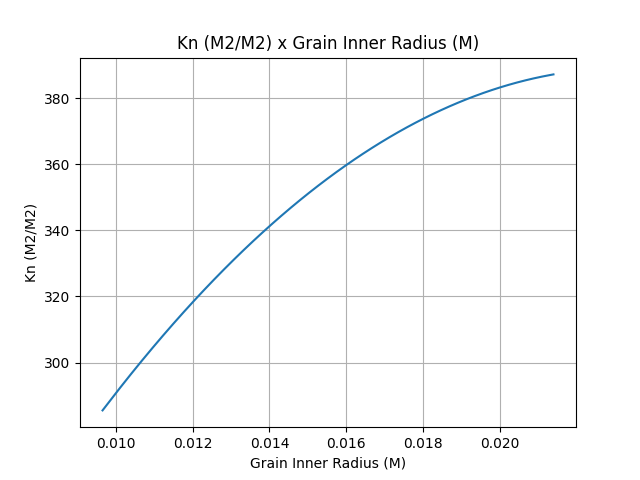

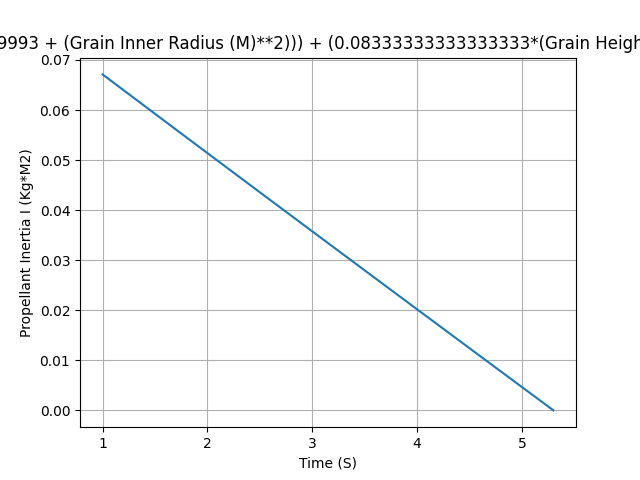

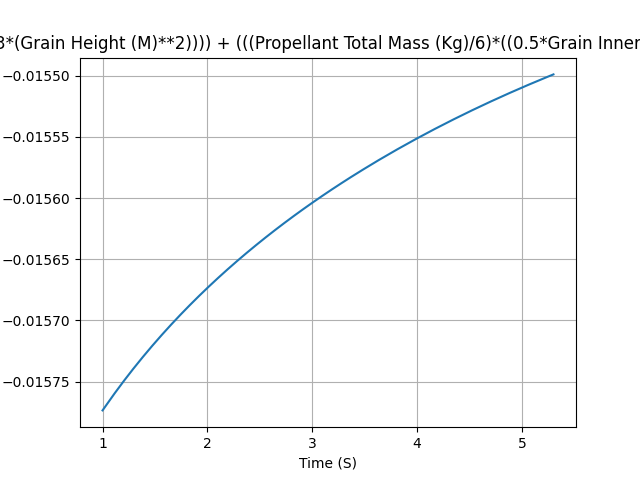

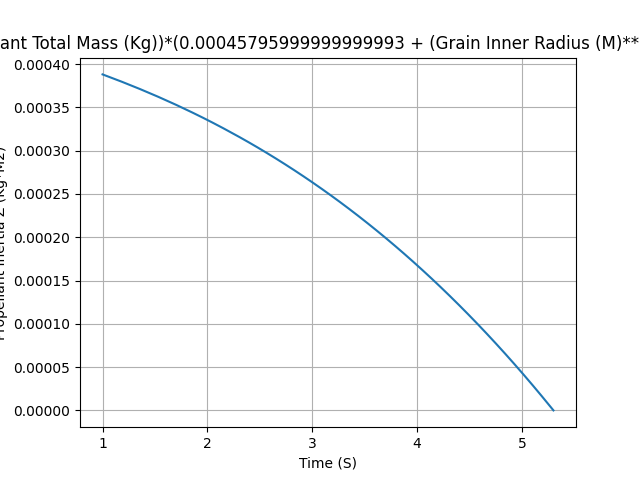

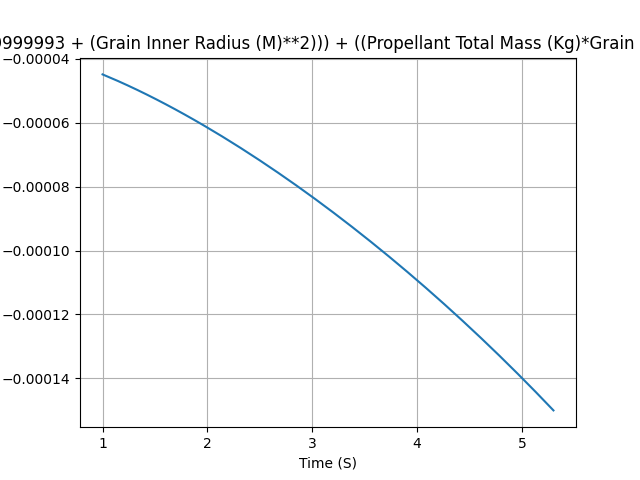

In [5]:
MOTOR.allInfo()


### Thrust From Static Firings (CSV Files)

Usually one has much more precise information about the motor and wishes to specify a directory containing a .csv file (the file shall contain no headers) which contains thrust (Newtons) as a function of time (seconds). That can be done as follows:

In [6]:
MOTOR = SolidMotor(
    thrustSource=r"../../data/motors/keron/thrustCurve.csv",
    burn_time=5.274,
    reshapeThrustCurve=False,
    grainsCenterOfMassPosition=-0.571,
    grainNumber=6,
    grainSeparation=6 / 1000,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    grainDensity=1707,
    nozzleRadius=21.642 / 1000,
    throatRadius=8 / 1000,
    interpolationMethod="linear",
    nozzlePosition=-1.024,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)



Motor Details
Total Burning Time: 5.274 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 997.735 m/s
Average Thrust: 266.496 N
Maximum Thrust: 1067.2752795031056 N at 1.506857142857143 s after ignition.
Total Impulse: 1405.499 Ns

Plots


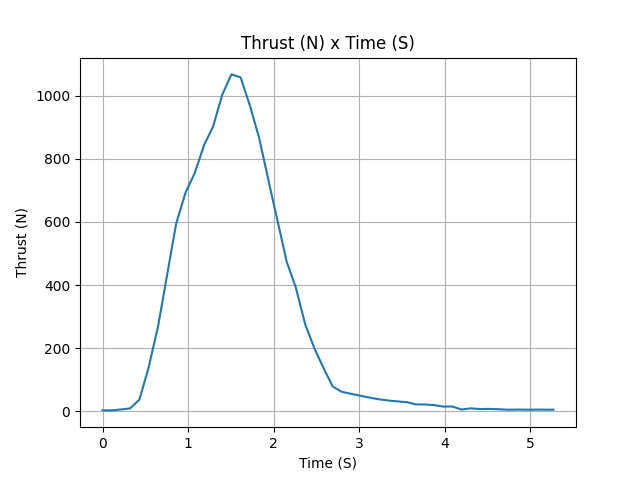

In [7]:
MOTOR.info()


### Eng Files Are Also Supported! (RASP)

Most rocket motors providers share the thrust curve from their motors using the RASP file format (`.eng` files). RocketPy can import such files as the thrust source. Furthermore, if you have a thrust curve in a `.csv`file, RocketPy can also read your data and exported as a `.eng` file.

In [8]:
MOTOR = SolidMotor(
    thrustSource=r"../../data/motors/Cesaroni_M1670.eng",
    burn_time=3.0,
    grainsCenterOfMassPosition=-0.571,
    grainNumber=6,
    grainSeparation=6 / 1000,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    grainDensity=1707,
    nozzleRadius=21.642 / 1000,
    throatRadius=8 / 1000,
    interpolationMethod="linear",
)


In [ ]:
MOTOR.allInfo()

#### One More Option...

There is also a fourth option where one specifies the thrust source parameter by passing a callable function like below.

In [9]:
MOTOR = SolidMotor(
    thrustSource=lambda x: 1 / (x + 1),
    burn_time=5.274,
    reshapeThrustCurve=False,
    grainsCenterOfMassPosition=-0.571,
    grainNumber=6,
    grainSeparation=6 / 1000,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    grainDensity=1707,
    nozzleRadius=21.642 / 1000,
    throatRadius=8 / 1000,
    interpolationMethod="linear",
)


Nozzle Details
Nozzle Radius: 0.021641999999999998 m
Nozzle Throat Radius: 0.008 m

Grain Details
Number of Grains: 6
Grain Spacing: 0.006 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Motor Details
Total Burning Time: 5.274 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 1.304 m/s
Average Thrust: 0.348 N
Maximum Thrust: 1.0 N at 0.0 s after ignition.
Total Impulse: 1.837 Ns

Plots


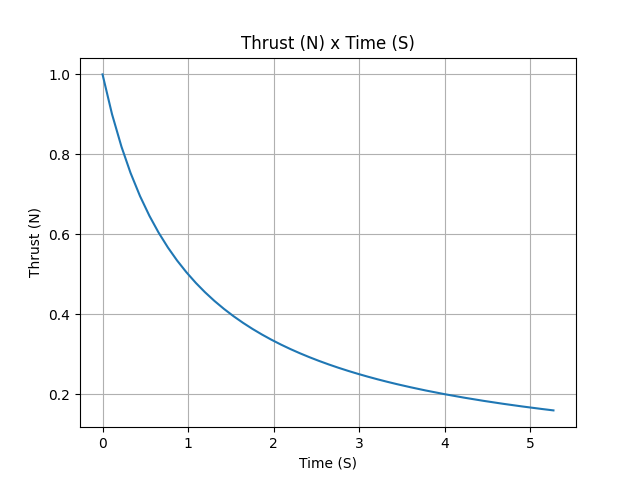

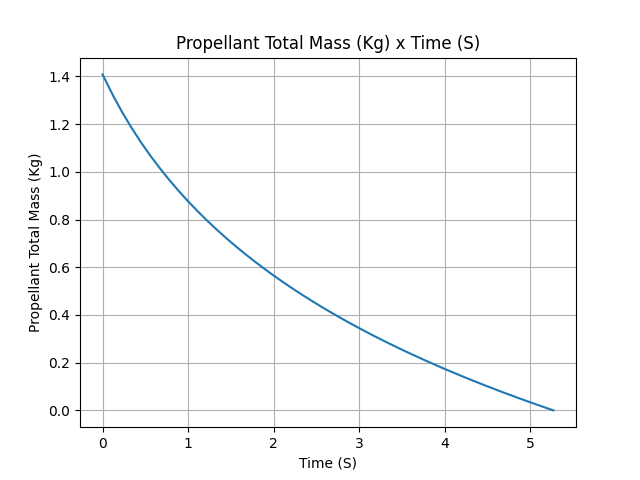

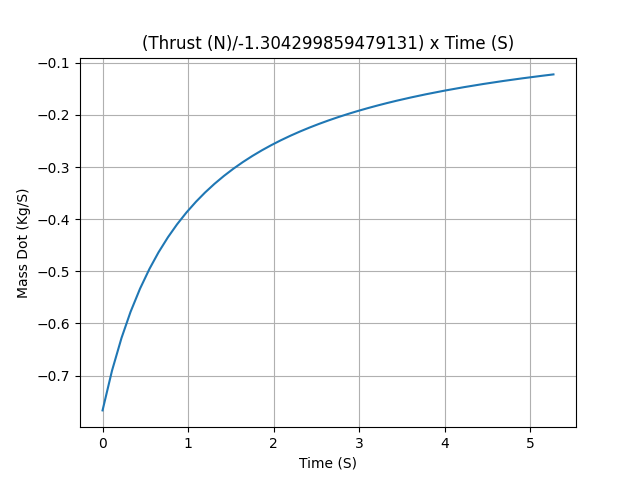

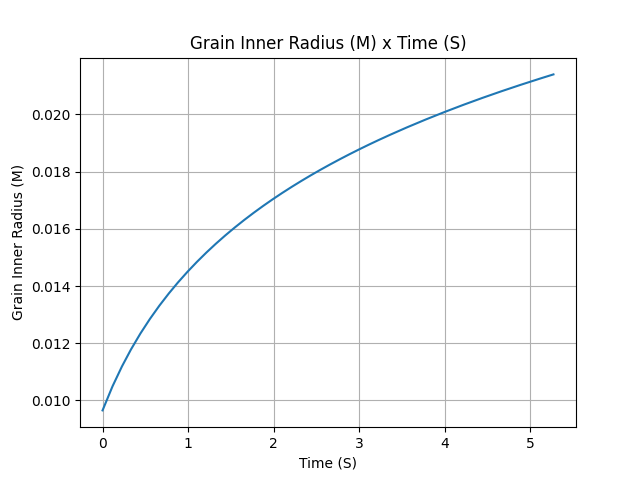

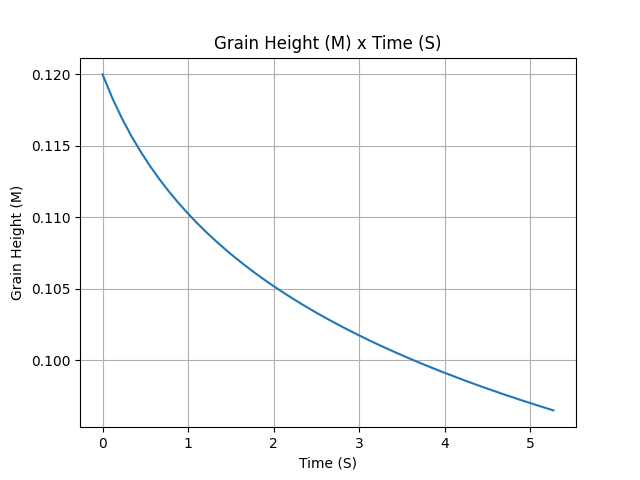

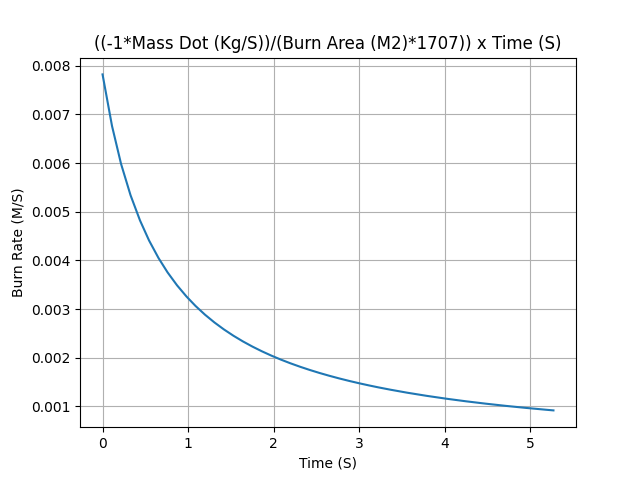

/home/phmb/github/RocketPy/rocketpy/Function.py:1272: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


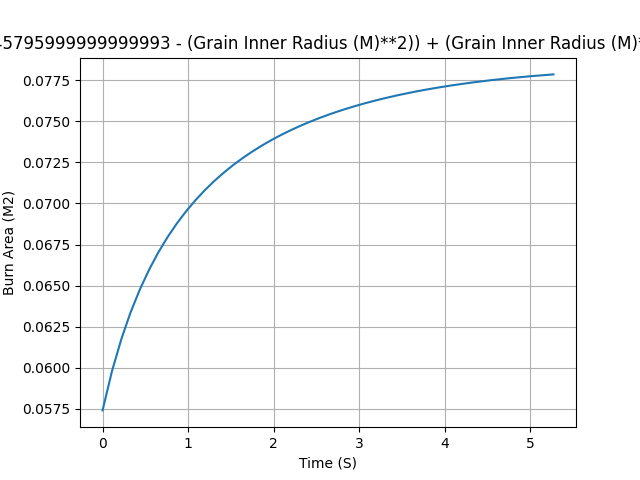

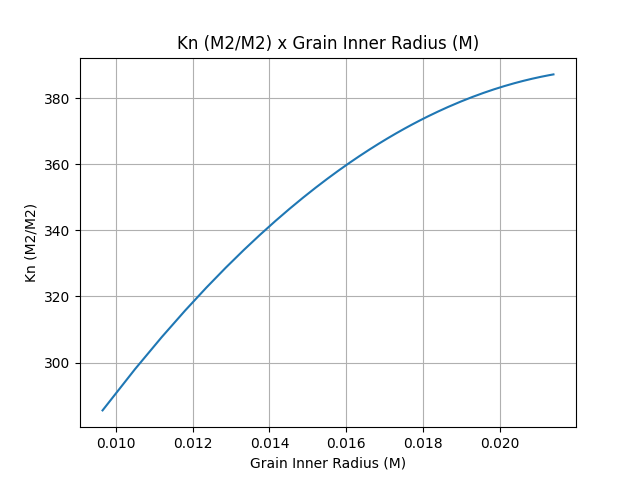

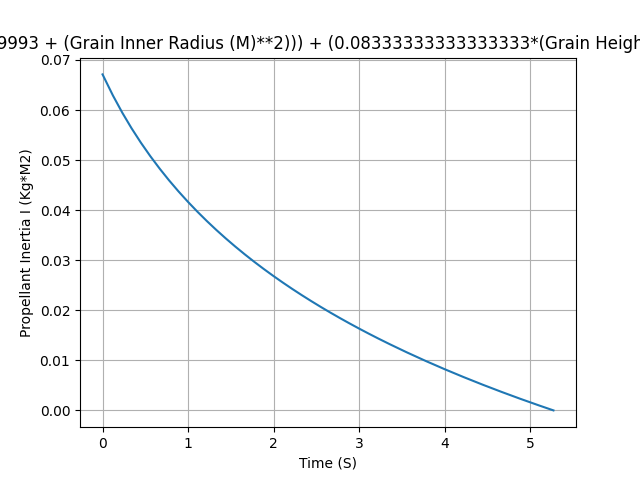

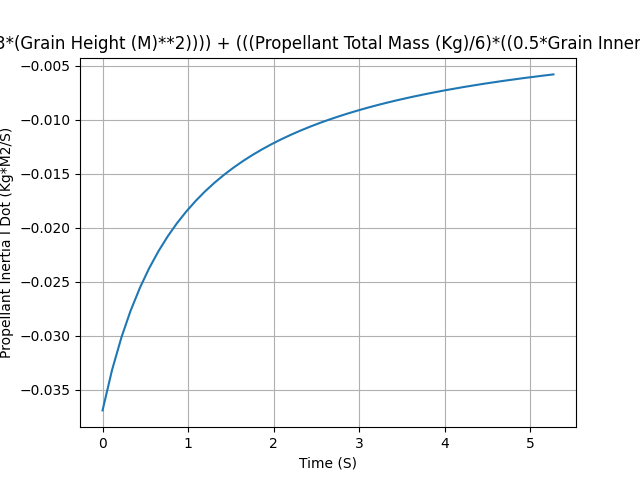

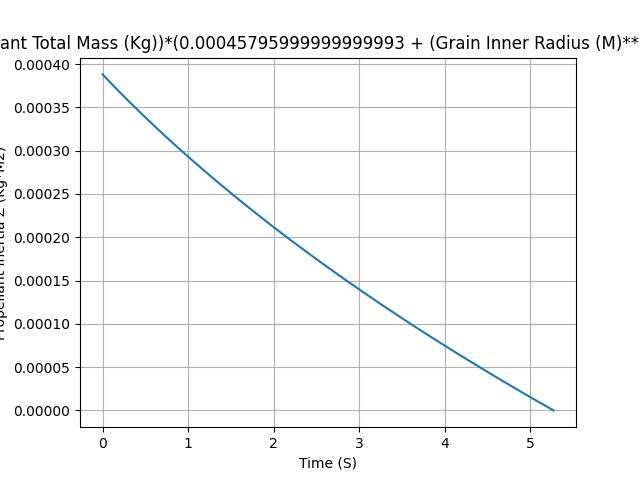

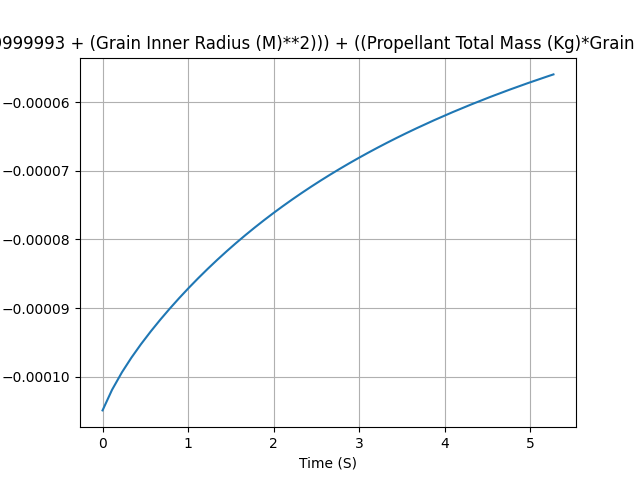

In [10]:
MOTOR.allInfo()


# Reshaping and interpolating the thrust curve

We know explore the reshape feature concerning the thrust curve and the interpolation method. Sometimes is useful to rescale a given curve to match new specifications when impulse and burn out time are expected to vary only slightly. That can be done how we know exemplify by setting the new burn out time in seconds to be ten and the new total impulse to be 6000 Ns.

In [11]:
MOTOR = SolidMotor(
    thrustSource=r"../../data/motors/keron/thrustCurve.csv",
    burn_time=5.274,
    reshapeThrustCurve=[10, 6000],
    grainsCenterOfMassPosition=-0.571,
    grainNumber=6,
    grainSeparation=6 / 1000,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    grainDensity=1707,
    nozzleRadius=21.642 / 1000,
    throatRadius=8 / 1000,
    interpolationMethod="linear",
)


Pay close attention to the newly generated curve and be aware of the changes the rescale has produced regarding the physical quantities.


Motor Details
Total Burning Time: 10 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 4259.277 m/s
Average Thrust: 600.000 N
Maximum Thrust: 2497.5464661863084 N at 2.857142857142857 s after ignition.
Total Impulse: 6000.000 Ns

Plots


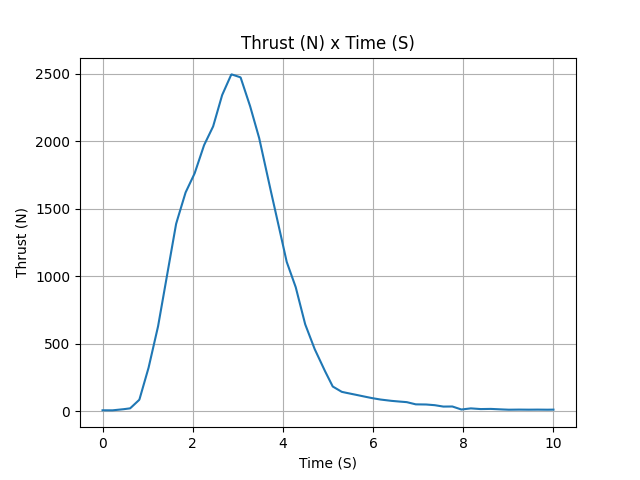

In [12]:
MOTOR.info()


Nozzle Details
Nozzle Radius: 0.021641999999999998 m
Nozzle Throat Radius: 0.008 m

Grain Details
Number of Grains: 6
Grain Spacing: 0.006 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Motor Details
Total Burning Time: 10 s
Total Propellant Mass: 1.409 kg
Propellant Exhaust Velocity: 4259.277 m/s
Average Thrust: 600.000 N
Maximum Thrust: 2497.5464661863084 N at 2.857142857142857 s after ignition.
Total Impulse: 6000.000 Ns

Plots


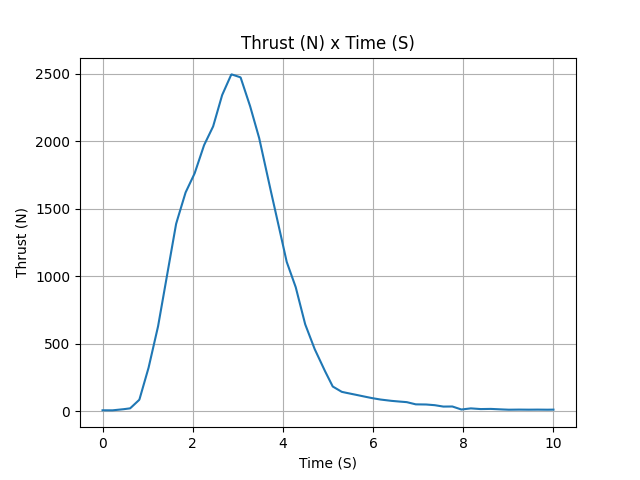

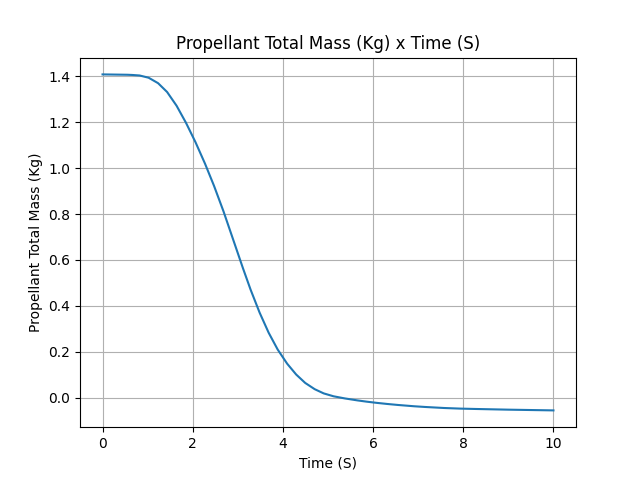

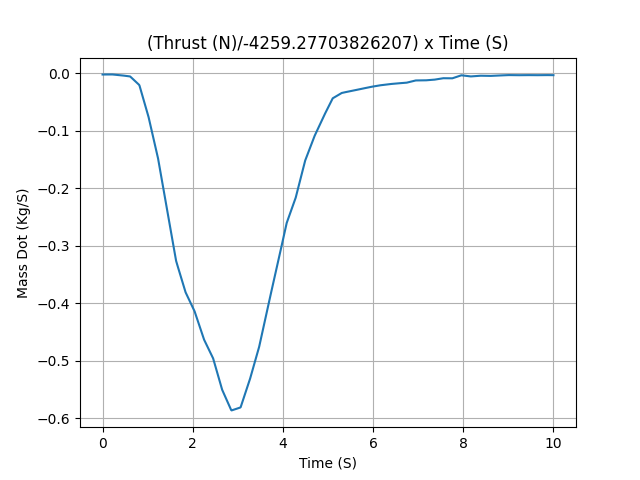

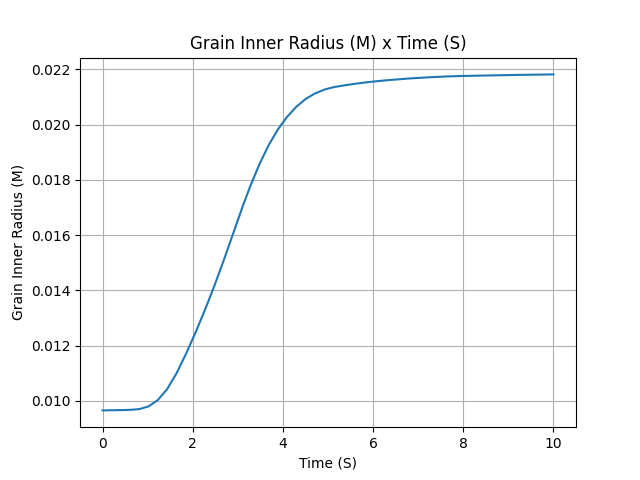

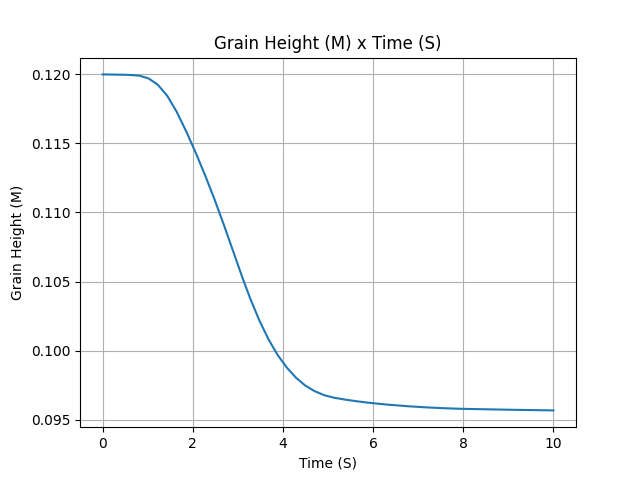

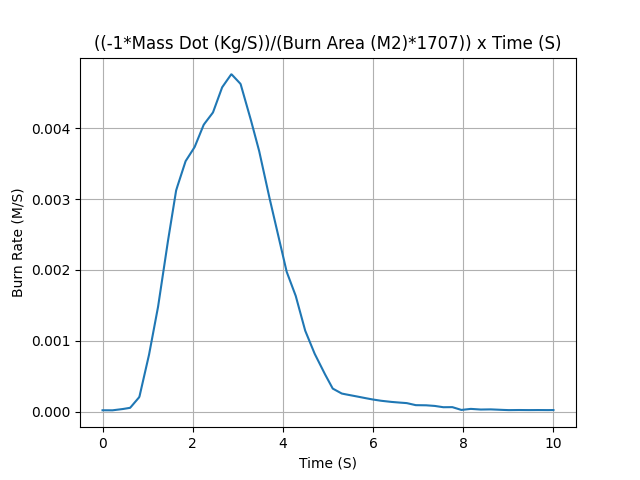

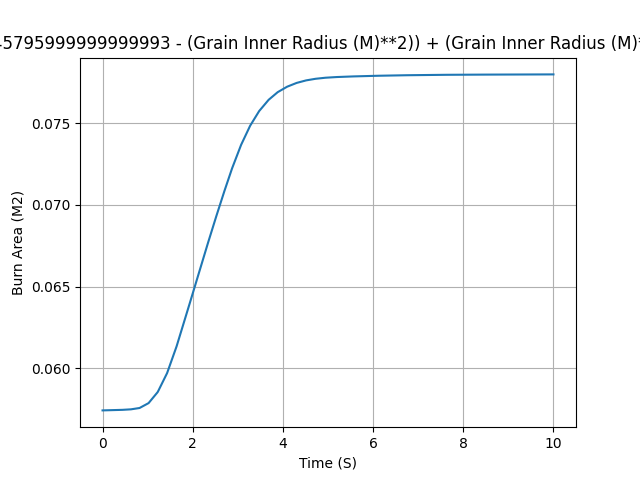

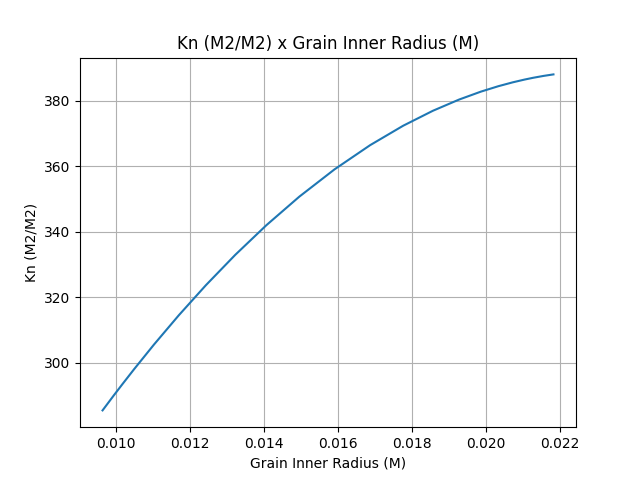

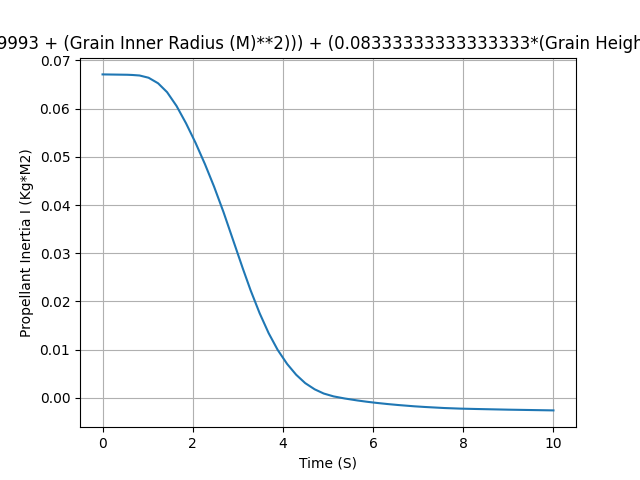

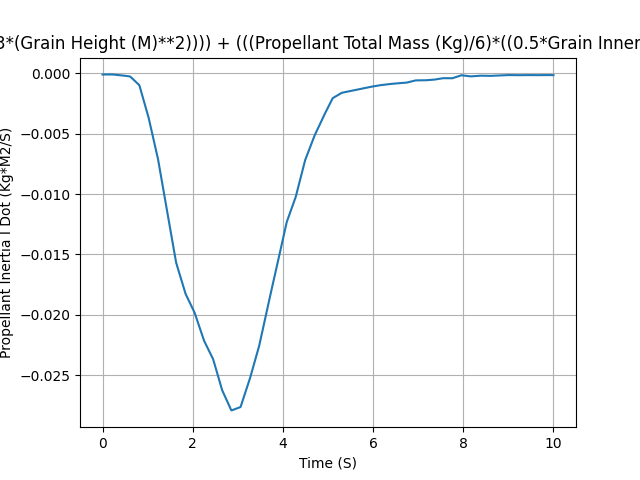

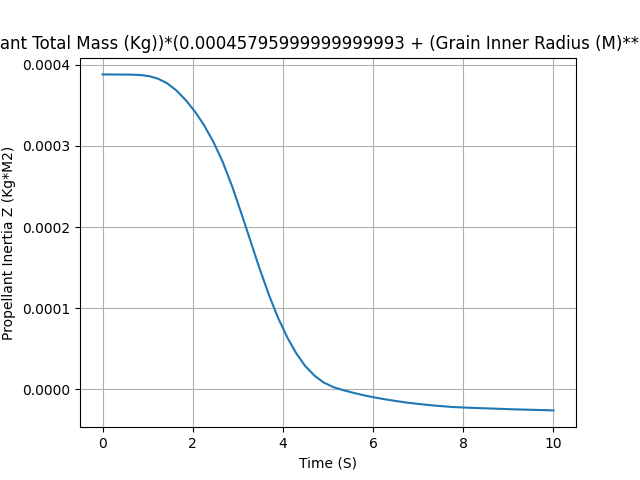

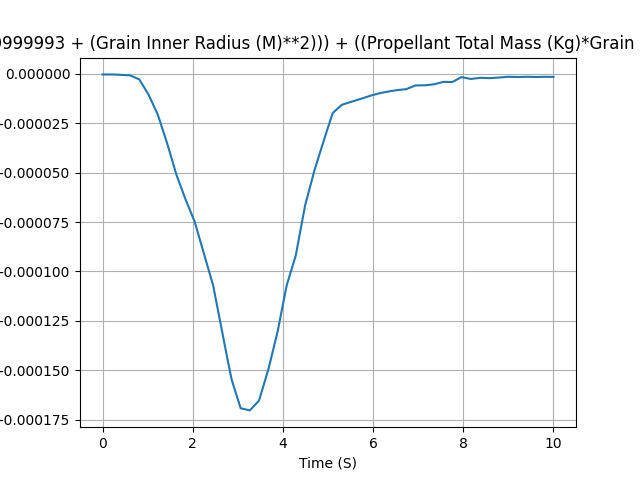

In [13]:
MOTOR.allInfo()


Also one is able to specify a certain interpolation method. That can be done by simply changing the 'interpolationMethod' parameter to 'spline' , 'akima' or 'linear'. Default is set to linear. 

## Key Assumptions and Grain Configurations

One might wonder how some parameters were calculated and what key assumptions were made. Regarding grain configuration one should pay close attention to the fact that only BATES grain configuration is supported. 

Finally, another key physical assumption is that constant exhaust velocity is assumed to be the case at all times which is in fact equivalent to saying that specific impulse is constant.